In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [11]:
df = pd.read_csv("/content/archive (19).zip", encoding="ISO-8859-1")
df



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
column_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(column_to_remove, axis=1)

In [14]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
#Drop duplicated values
df=df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.shape

(5169, 2)

In [20]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

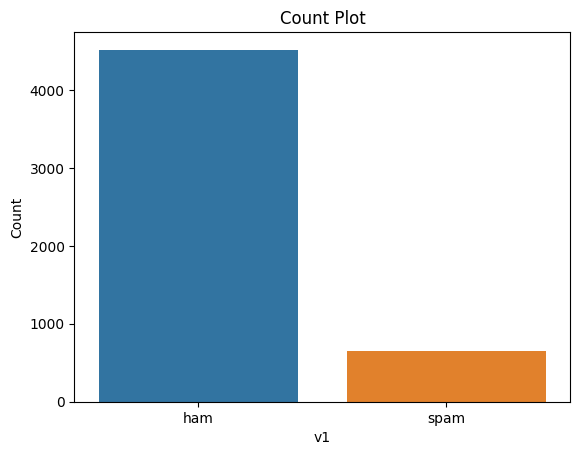

In [21]:
#DATA VISUALISATION

sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

In [24]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] =  1

In [25]:
df

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.0
5568,ham,Will Ì_ b going to esplanade fr home?,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",1.0
5570,ham,The guy did some bitching but I acted like i'd...,1.0


In [26]:
X=df['v2']
y=df['Category']

In [27]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [28]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [34]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [35]:
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [36]:
X_train

4228    Have you bookedthe hut? And also your time off...
3061                            Fine. Do you remember me.
3345    U're welcome... Caught u using broken english ...
3463                                             My phone
2649    You might want to pull out more just in case a...
                              ...                        
3534                             I'm at home. Please call
1124                   Aiyar sorry lor forgot 2 tell u...
2628    Haha... They cant what... At the most tmr forf...
3833           Watching tv lor. Nice one then i like lor.
2694    Hey sexy buns! What of that day? No word from ...
Name: v2, Length: 4135, dtype: object

In [ ]:
print(X_train_features)

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [38]:
predict_train_data=model.predict(X_train_features)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9620314389359129


In [40]:
predict_test_data=model.predict(X_test_features)

In [41]:
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.960348162475822


In [42]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


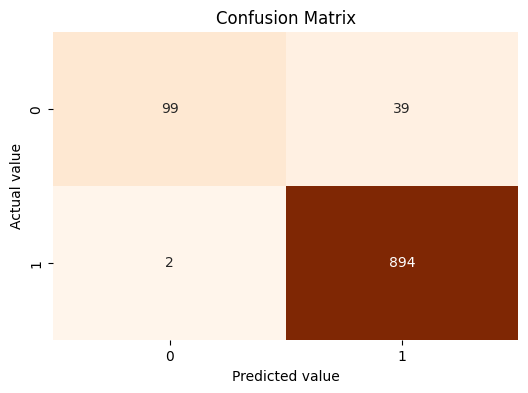

In [43]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()